<a href="https://colab.research.google.com/github/CUNY-SPS-Data-Science-Program/your-bio-mianshariq/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [239]:
allies = pd.read_csv('https://github.com/mianshariq/Datasets/raw/699e8d1e318ec887ede3196826beb9684ee4175b/Allies.csv')
emmision_goals= pd.read_csv('https://github.com/mianshariq/Datasets/raw/07d893b1b71468dc8854da2b8dc0026e939de169/Emmision%20Goals.csv')

In [240]:
import pandas as pd

# Try different encodings until you find the one that works
encodings_to_try = ['ISO-8859-1', 'latin1']

for encoding in encodings_to_try:
    try:
        cm_prod = pd.read_csv('https://github.com/mianshariq/Datasets/raw/b11f8b6683b88108618c28f3f3fd9dd517716b1e/Critical_Minerals_Production_news.csv', encoding=encoding)
        # If successful, break out of the loop
        break
    except UnicodeDecodeError:
        print(f"Failed to decode using encoding: {encoding}")

# Now 'cm_prod' should contain the DataFrame with the correct encoding


In [241]:
cm_prod.head()

,Mineral,Uses,Rank_2021,Country,Production_2021_Metric Ton,Production_2021_KiloTon,Share_Percentage
0,Lithium,used for rechargeable batteries,4,Argentina,12870,12.87,5.53
1,Gadolinium,used in medical imaging permanent magnets and...,4,Australia,176800,6.95,62.22
2,Lanthanum,used to produce catalysts ceramics glass poli...,5,Australia,8,0.01,3.21
3,Magnesium,used as an alloy and for reducing metals,5,Australia,3,0.00,0.00
4,Neodymium,used in permanent magnets rubber catalysts an...,3,Australia,18000,18.00,6.20


In [242]:
allies.rename(columns={'County': 'Country'}, inplace=True)

In [243]:
df = cm_prod.merge(allies, on='Country', how='left')

In [244]:
df

,Mineral,Uses,Rank_2021,Country,Production_2021_Metric Ton,Production_2021_KiloTon,Share_Percentage,Relationship
0,Lithium,used for rechargeable batteries,4,Argentina,12870,12.87,5.53,Neutral
1,Gadolinium,used in medical imaging permanent magnets and...,4,Australia,176800,6.95,62.22,Ally
2,Lanthanum,used to produce catalysts ceramics glass poli...,5,Australia,8,0.01,3.21,Ally
3,Magnesium,used as an alloy and for reducing metals,5,Australia,3,0.00,0.00,Ally
4,Neodymium,used in permanent magnets rubber catalysts an...,3,Australia,18000,18.00,6.20,Ally
...,...,...,...,...,...,...,...,...
245,Chromium,used primarily in stainless steel and other a...,5,Zimbabwe,644400,644.40,4.39,Competitor
246,Europium,used in phosphors and nuclear control rods,5,Zimbabwe,12,0.01,4.41,Competitor
247,Palladium,used in catalytic converters and as a catalys...,5,Zimbabwe,12619,12.62,5.94,Competitor
248,Platinum,used in catalytic converters,3,Zimbabwe,14732,14.73,7.72,Competitor


In [245]:
result_1 = df.groupby(['Rank_2021', 'Country']).agg({
    'Country': ['count'],
    ' Share_Percentage ': ['mean', "count"]
    # Add more columns as needed
}).reset_index()

In [246]:
result_1.columns = ['Rank_2021', 'Country','Sum_Rank_2021', 'Avg_Share_Percentage','Count_Ranks']

In [247]:
result_1=result_1.sort_values('Count_Ranks', ascending=False)

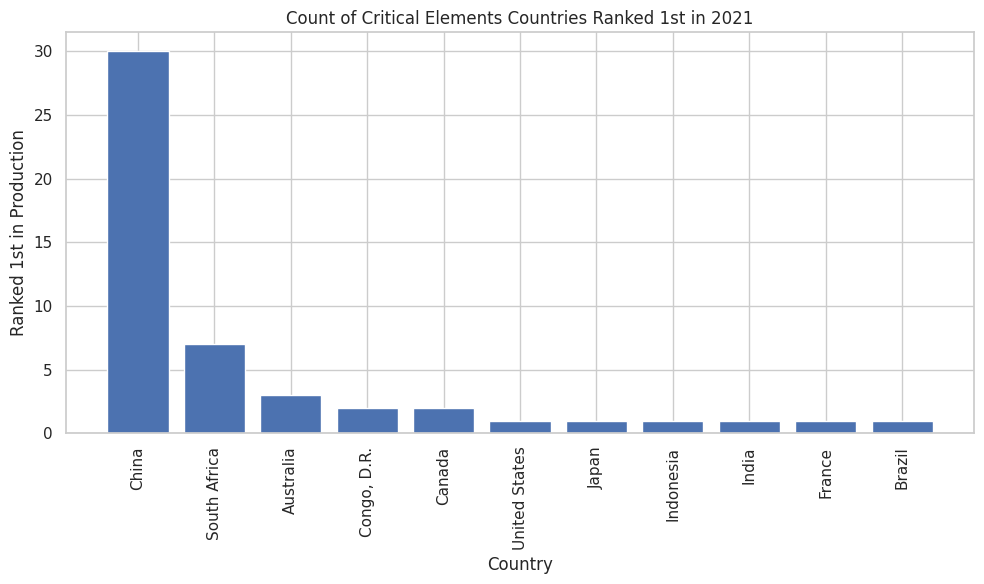

In [248]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Sample GeoDataFrame with Role, State, and Median Salary columns
# Replace with your actual data

result_1= result_1[result_1['Rank_2021'] == 1]
# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(result_1['Country'], result_1['Sum_Rank_2021'],edgecolor=None)
plt.xlabel('Country')
plt.ylabel('Ranked 1st in Production')
plt.title('Count of Critical Elements Countries Ranked 1st in 2021')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'South Africa'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Congo, D.R.'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Indonesia'),
  Text(8, 0, 'India'),
  Text(9, 0, 'France'),
  Text(10, 0, 'Brazil')])

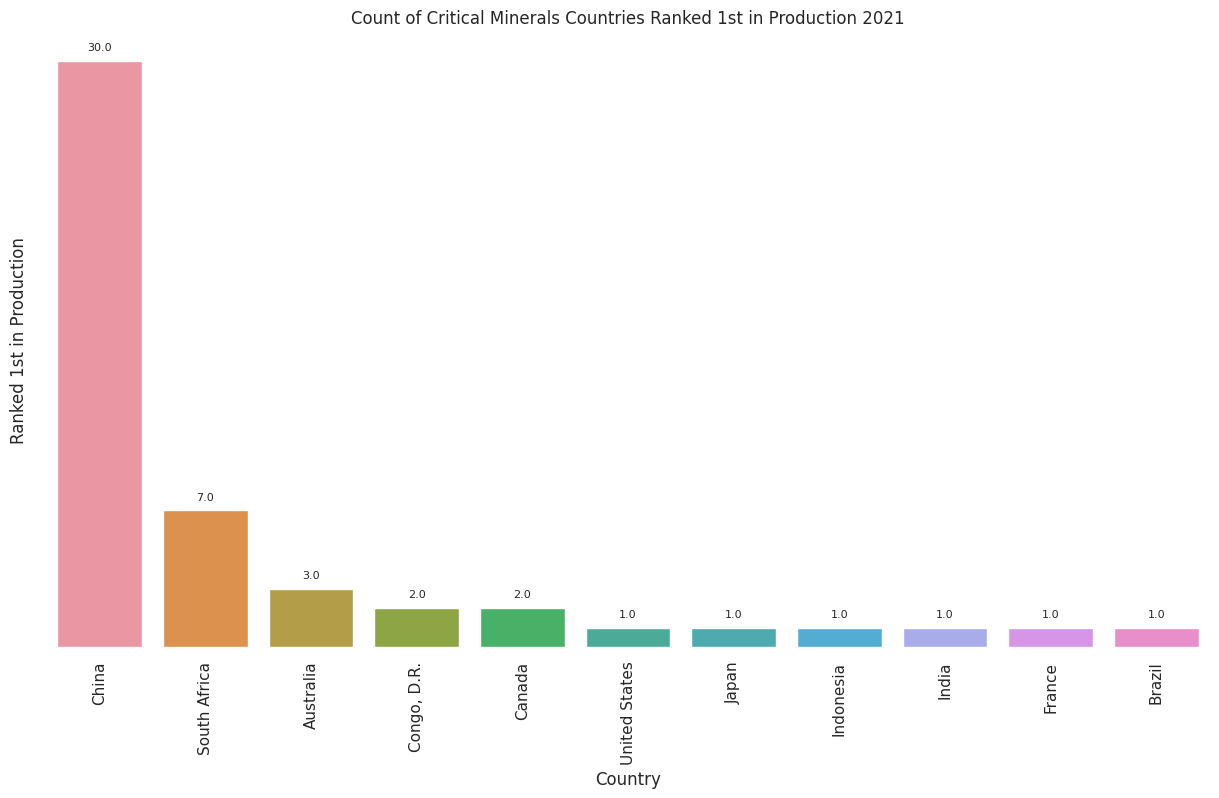

In [249]:

plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

# Create a bar plot with annotations
ax = sns.barplot(x=result_1['Country'], y=result_1['Sum_Rank_2021'], errorbar=None, edgecolor=None)
sns.despine(left=True, bottom=True)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 2)}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

ax.set(yticklabels=[])
ax.yaxis.grid(False)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Ranked 1st in Production')
plt.title('Count of Critical Minerals Countries Ranked 1st in Production 2021')
plt.xticks(rotation=90)

In [250]:
result = df.groupby('Country').agg({
    'Rank_2021': ['mean', 'sum'],
    ' Share_Percentage ': ['mean', "count"]
    # Add more columns as needed
}).reset_index()

In [251]:
result.columns = ['Country','Mean_Rank_2021', 'Sum_Rank_2021', 'Avg_Share_Percentage','Count_Ranks']

In [252]:
result=result.sort_values('Count_Ranks', ascending=False)

In [253]:
result

,Country,Mean_Rank_2021,Sum_Rank_2021,Avg_Share_Percentage,Count_Ranks
8,China,1.666667,70,43.214524,42
34,Russia,2.695652,62,15.594783,23
46,United States,3.105263,59,17.410526,19
1,Australia,3.352941,57,16.314706,17
16,India,3.750000,60,13.765625,16
6,Canada,3.400000,51,12.132667,15
5,Brazil,3.285714,46,16.845000,14
37,South Africa,2.153846,28,33.327692,13
19,Japan,2.714286,19,19.057143,7
48,Zimbabwe,4.333333,26,8.508333,6


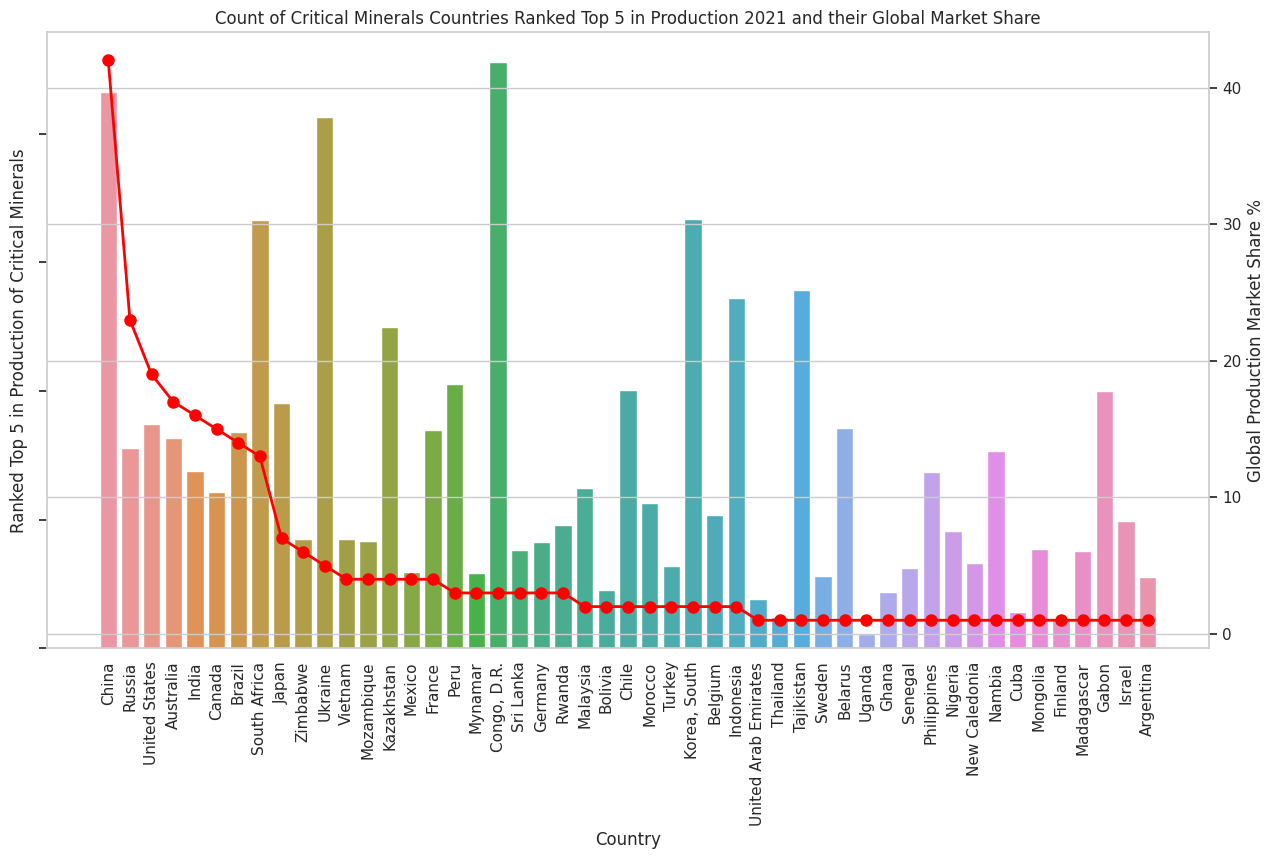

In [254]:

plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

# Create a bar plot with annotations
ax = sns.barplot(x=result['Country'], y=result['Avg_Share_Percentage'], errorbar=None, edgecolor=None)
sns.despine(left=True, bottom=True)



ax.set(yticklabels=[])
ax.yaxis.grid(False)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Ranked Top 5 in Production of Critical Minerals')
plt.title('Count of Critical Minerals Countries Ranked Top 5 in Production 2021 and their Global Market Share')
plt.xticks(rotation=90)

# Create a secondary y-axis for the line plot
ax2 = ax.twinx()
ax2.plot(result['Country'], result['Count_Ranks'], color='red', marker='o', linestyle='-', linewidth=2, markersize=8)

# Add labels for the secondary y-axis
ax2.set_ylabel('Global Production Market Share %')

plt.show()

In [302]:
df1 = df.merge(emmision_goals, on='Mineral', how='left')

In [303]:
df1=df1.sort_values('KT_Diff', ascending=False)

In [304]:
pivot_df2 = df1.pivot_table(index='Mineral', columns='Relationship', values=' Share_Percentage ', aggfunc='sum')
pivot_df2.drop('Germanium', inplace=True)
pivot_df2.drop('Gallium', inplace=True)
pivot_df2.drop('Gadolinium', inplace=True)
pivot_df2.drop('Niobium', inplace=True)
pivot_df2=pivot_df2.sort_values('Ally', ascending=False)

In [305]:
pivot_df2

Relationship,Ally,Competitor,Neutral
Mineral,,,
Iridium,95.49,4.50,NaN
Rubidium,92.69,7.32,NaN
Ruthenium,90.54,9.46,NaN
Platinum,79.42,18.11,NaN
Lithium,79.27,13.12,5.53
Hafnium,78.87,21.13,NaN
Beryllium,67.79,27.34,4.87
Lutetium,64.28,35.71,NaN
Chromium,63.40,4.39,21.33


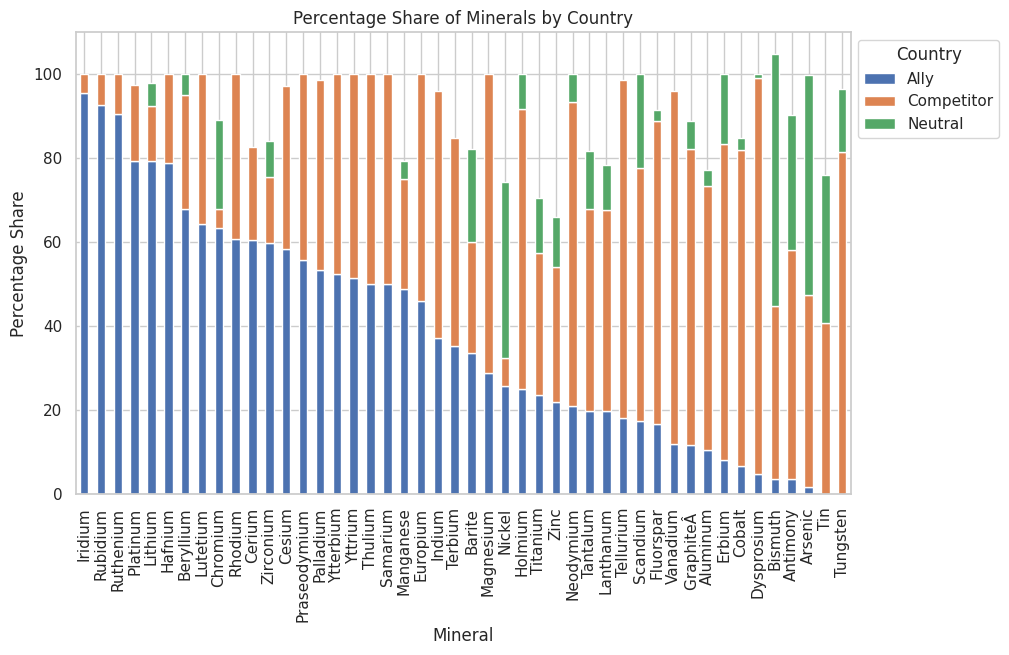

In [306]:

# Convert the 'Mineral' column to non-categorical
pivot_df2.index = pivot_df2.index.astype(str)

# Plot the stacked bar graph
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df2.plot(kind='bar', stacked=True, ax=ax)


# Add labels and title
plt.xlabel('Mineral')
plt.ylabel('Percentage Share')
plt.title('Percentage Share of Minerals by Country')

# Show the legend for other countries
plt.legend(title='Country', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


In [298]:
df1=df1.head(55)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Nickel'),
  Text(1, 0, 'Manganese'),
  Text(2, 0, 'Zinc'),
  Text(3, 0, 'Lithium'),
  Text(4, 0, 'Vanadium'),
  Text(5, 0, 'Chromium'),
  Text(6, 0, 'Cobalt'),
  Text(7, 0, 'Neodymium'),
  Text(8, 0, 'Magnesium'),
  Text(9, 0, 'Arsenic'),
  Text(10, 0, 'Zirconium')])

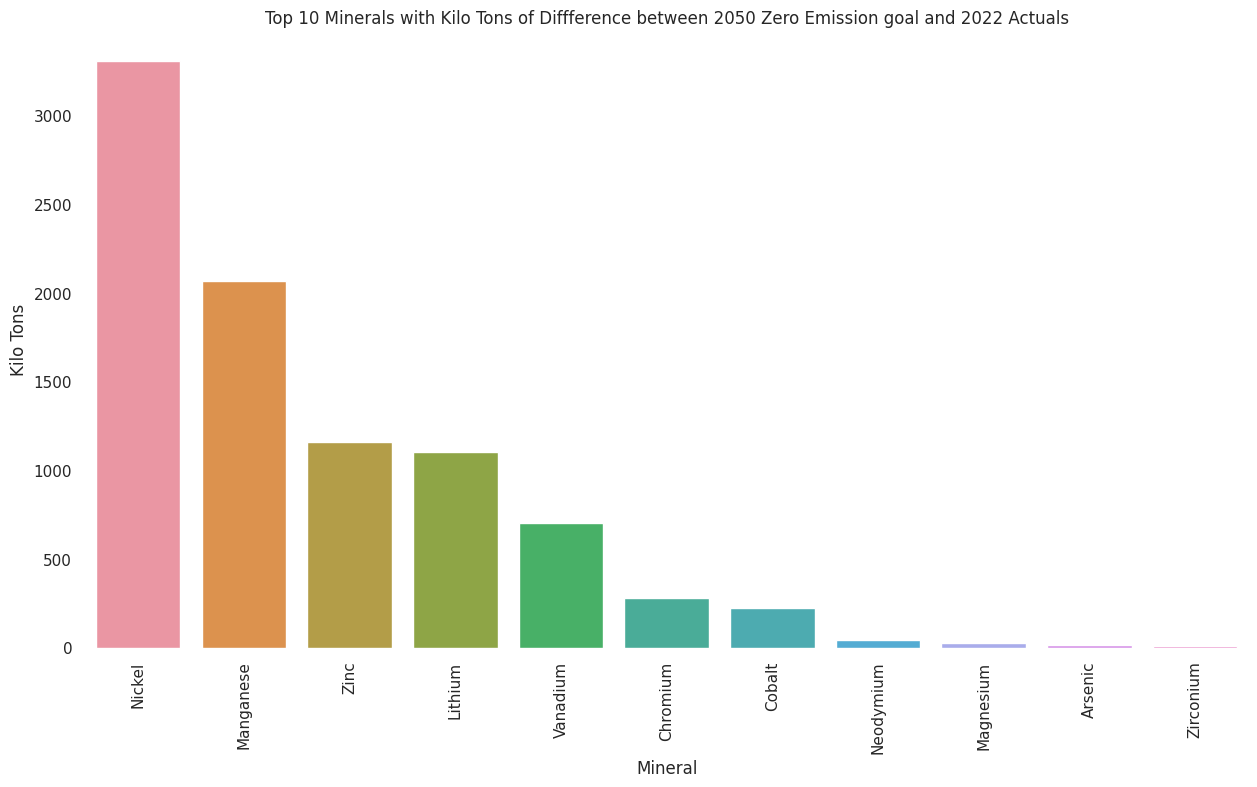

In [263]:

plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

# Create a bar plot with annotations
ax = sns.barplot(x=df1['Mineral'], y=df1['KT_Diff'], errorbar=None, edgecolor=None)
sns.despine(left=True, bottom=True)

ax.yaxis.grid(False)

# Add labels and title
plt.xlabel('Mineral')
plt.ylabel('Kilo Tons')
plt.title('Top 10 Minerals with Kilo Tons of Diffference between 2050 Zero Emission goal and 2022 Actuals')
plt.xticks(rotation=90)

In [259]:
df1

,Mineral,Uses,Rank_2021,Country,Production_2021_Metric Ton,Production_2021_KiloTon,Share_Percentage,Relationship,2022_Actuals,Net Zero Emissions by 2050 scenario,KT_Diff,% Increase
160,Nickel,used to make stainless steel superalloys and ...,4,New Caledonia,186284,186.28,6.62,Ally,456.7,3764.0,3307.3,724.21
14,Nickel,used to make stainless steel superalloys and ...,5,Australia,150876,150.88,5.36,Ally,456.7,3764.0,3307.3,724.21
180,Nickel,used to make stainless steel superalloys and ...,3,Russia,192000,192.00,6.83,Competitor,456.7,3764.0,3307.3,724.21
165,Nickel,used to make stainless steel superalloys and ...,2,Philippines,386359,386.36,13.74,Ally,456.7,3764.0,3307.3,724.21
126,Nickel,used to make stainless steel superalloys and ...,1,Indonesia,1173200,1173.20,41.72,Neutral,456.7,3764.0,3307.3,724.21
77,Manganese,used in steelmaking and batteries,4,China,1300000,1300.00,6.13,Competitor,173.8,2240.3,2066.6,1189.36
198,Manganese,used in steelmaking and batteries,1,South Africa,7098396,7098.40,33.45,Ally,173.8,2240.3,2066.6,1189.36
105,Manganese,used in steelmaking and batteries,2,Gabon,4240100,4240.10,19.98,Competitor,173.8,2240.3,2066.6,1189.36
109,Manganese,used in steelmaking and batteries,5,Ghana,934200,934.20,4.40,Neutral,173.8,2240.3,2066.6,1189.36
13,Manganese,used in steelmaking and batteries,3,Australia,3278840,3278.84,15.45,Ally,173.8,2240.3,2066.6,1189.36


In [260]:
# Pivot the DataFrame to create a format suitable for a stacked bar plot
pivot_df = df1.pivot_table(index='Mineral', columns='Country', values=' Share_Percentage ', aggfunc='sum')
#pivot_df.drop('Vanadium', inplace=True)
pivot_df=pivot_df.sort_values('China', ascending=False)

In [261]:
pivot_df

Country,Argentina,Australia,Belgium,Brazil,Canada,Chile,China,"Congo, D.R.",Cuba,Gabon,...,New Caledonia,Peru,Philippines,Russia,Senegal,South Africa,Thailand,Turkey,United States,Zimbabwe
Mineral,,,,,,,,,,,,,,,,,,,,,
Neodymium,NaN,6.20,NaN,NaN,NaN,NaN,72.39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.45,NaN,14.82,NaN
Vanadium,NaN,NaN,NaN,1.21,NaN,NaN,63.82,NaN,NaN,NaN,...,NaN,NaN,NaN,20.06,NaN,8.80,NaN,NaN,NaN,NaN
Magnesium,NaN,0.00,NaN,NaN,NaN,NaN,47.22,NaN,NaN,NaN,...,NaN,NaN,NaN,23.98,NaN,NaN,NaN,NaN,18.90,NaN
Arsenic,NaN,NaN,1.82,NaN,NaN,NaN,43.72,NaN,NaN,NaN,...,NaN,39.84,NaN,1.82,NaN,NaN,NaN,NaN,NaN,NaN
Zinc,NaN,10.17,NaN,NaN,NaN,NaN,31.99,NaN,NaN,NaN,...,NaN,11.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithium,5.53,48.85,NaN,2.44,NaN,27.98,13.12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zirconium,NaN,39.08,NaN,NaN,NaN,NaN,9.61,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.23,20.67,NaN,NaN,NaN,NaN
Manganese,NaN,15.45,NaN,NaN,NaN,NaN,6.13,NaN,NaN,19.98,...,NaN,NaN,NaN,NaN,NaN,33.45,NaN,NaN,NaN,NaN
Chromium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,51.82,NaN,8.37,NaN,4.39


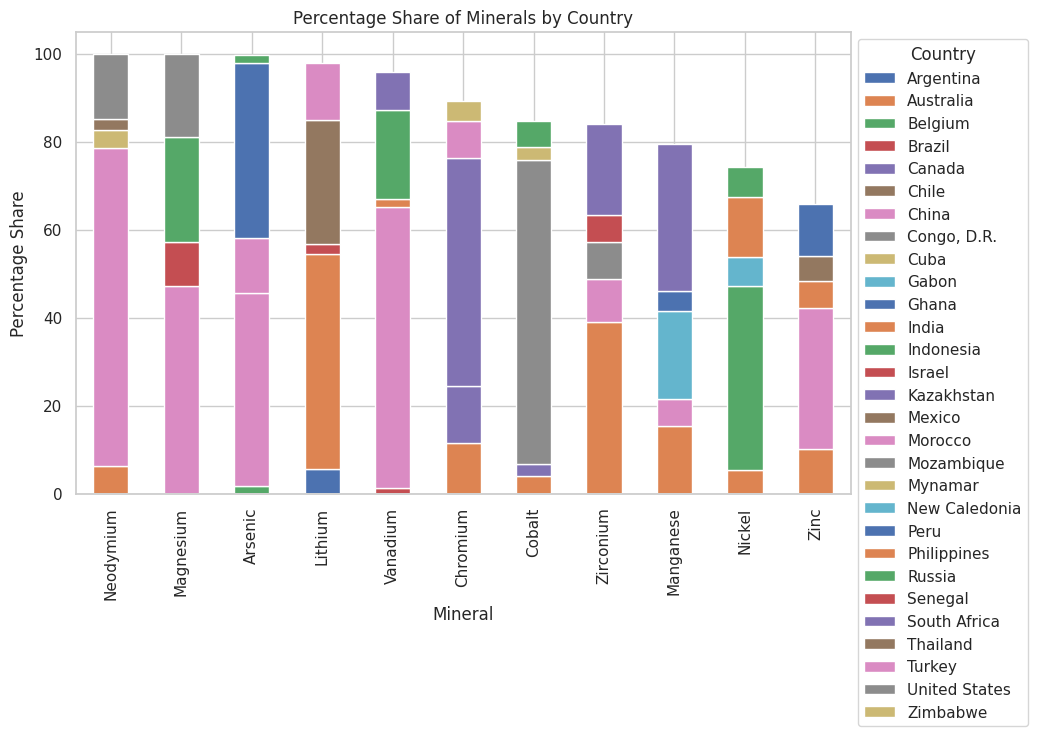

In [262]:

# Convert the 'Mineral' column to non-categorical
pivot_df.index = pivot_df.index.astype(str)

# Sort the DataFrame based on the sum of percentages
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar graph
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)


# Add labels and title
plt.xlabel('Mineral')
plt.ylabel('Percentage Share')
plt.title('Percentage Share of Minerals by Country')

# Show the legend for other countries
plt.legend(title='Country', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


In [265]:
# Pivot the DataFrame to create a format suitable for a stacked bar plot
pivot_df1 = df1.pivot_table(index='Mineral', columns='Relationship', values=' Share_Percentage ', aggfunc='sum')
#pivot_df.drop('Vanadium', inplace=True)
pivot_df1=pivot_df1.sort_values('Ally', ascending=False)

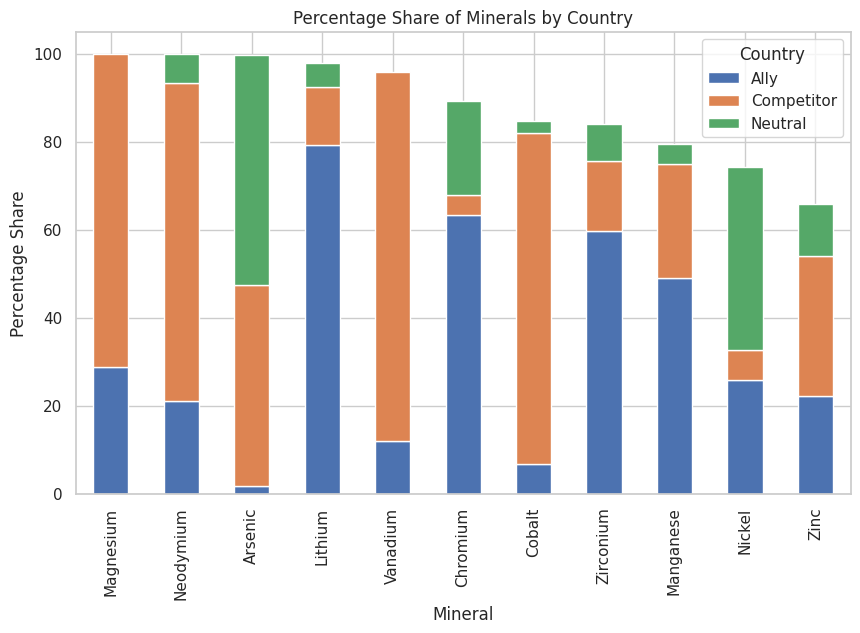

In [267]:

# Convert the 'Mineral' column to non-categorical
pivot_df1.index = pivot_df1.index.astype(str)

# Sort the DataFrame based on the sum of percentages
pivot_df1 = pivot_df1.loc[pivot_df1.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar graph
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df1.plot(kind='bar', stacked=True, ax=ax)


# Add labels and title
plt.xlabel('Mineral')
plt.ylabel('Percentage Share')
plt.title('Percentage Share of Minerals by Country')

# Show the legend for other countries
plt.legend(title='Country', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()
